In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import pandas as pd
import numpy as np
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator


In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.dpi'] = 1000
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.handlelength'] = 2.0
minor_locator = AutoMinorLocator(4)

## Perform equal-variance hypothesis test using Brown-Forsythe test:

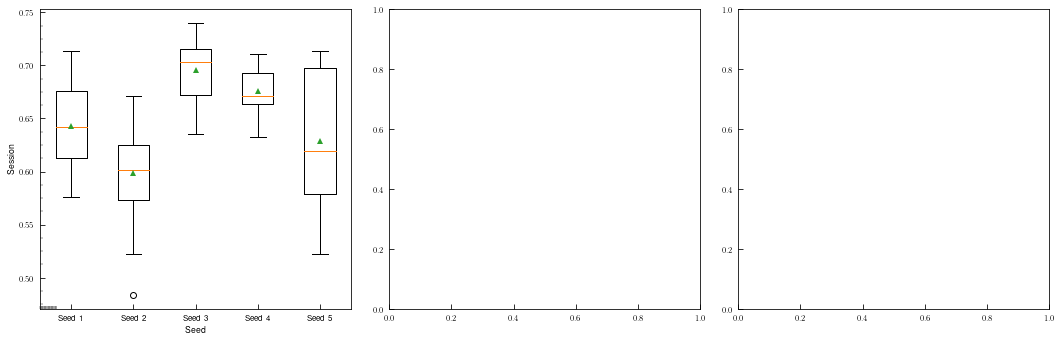

In [7]:
results = pd.read_excel('../docs/random_trial_result.xlsx', )
seed_1 = [results.accuracy_1, results.precision_1, results.recall_1]
seed_2 = [results.accuracy_2, results.precision_2, results.recall_2]
seed_3 = [results.accuracy_3, results.precision_3, results.recall_3]
seed_4 = [results.accuracy_4, results.precision_4, results.recall_4]
seed_5 = [results.accuracy_5, results.precision_5, results.recall_5]

legends = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5']
titles = ['Validation Accuracy', 'Validation Precision', 'Validation Recall']
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
for idx in range(3):
    axs[idx].boxplot([seed_1[idx], seed_2[idx], seed_3[idx], seed_4[idx], seed_5[idx]], showmeans = True)
    axs[idx].set_xlabel('Seed')
    axs[idx].set_ylabel('Session')
    axs[idx].set_title(titles[idx])
    axs[idx].xaxis.set_minor_locator(minor_locator)
    axs[idx].yaxis.set_minor_locator(minor_locator)
    axs[idx].set_xticks([1,2,3,4,5], legends)
plt.tight_layout()
plt.show()


In [ ]:
accuracy_test = \
    stats.levene(seed_1[0], seed_2[0], seed_3[0], seed_4[0], seed_5[0], center = 'median')
print(accuracy_test)
precision_test = \
    stats.levene(seed_1[1], seed_2[1], seed_3[1], seed_4[1], seed_5[1], center = 'median')
print(precision_test)
recall_test = \
    stats.levene(seed_1[2], seed_2[2], seed_3[2], seed_4[2], seed_5[2], center = 'median')
print(recall_test)

## Perform One-way ANOVA test

In [6]:
accuracy_results = \
    stats.f_oneway(seed_1[0], seed_2[0], seed_3[0], seed_4[0], seed_5[0])
print(accuracy_test)
precision_results = \
    stats.f_oneway(seed_1[1], seed_2[1], seed_3[1], seed_4[1], seed_5[1])
print(precision_test)
recall_results = \
    stats.f_oneway(seed_1[2], seed_2[2], seed_3[2], seed_4[2], seed_5[2])
print(recall_test)


LeveneResult(statistic=8.258315932917744, pvalue=4.986270854044205e-06)
LeveneResult(statistic=0.13040701620903677, pvalue=0.9710957239779227)
LeveneResult(statistic=0.2067096721915772, pvalue=0.93436037732569)
